In [5]:
import torch

# from torch.autograd import Variable  # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [6]:
# mldata.org is no longer operational.
# mnist = datasets.fetch_mldata('MNIST original', data_home='./data/') # deprecated

In [7]:
# https://www.openml.org
# https://www.openml.org/d/554
mnist = datasets.fetch_openml(name='mnist_784', data_home='./data/') # 사용하세요.

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
mnist.data.min(), mnist.data.max()

(0.0, 255.0)

In [10]:
# 값의 범위가 0~256 
# 정규화 0~1사이로 만듬
mnist_data = mnist.data / 255

# column 784 --> 28*28
mnist_df = pd.DataFrame(mnist_data)
mnist_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


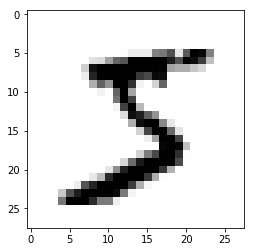

In [11]:
# p.85:
# 데이터가 없음.
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)

In [12]:
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
# 7만개
mnist_label.shape

(70000,)

In [14]:
train_size = 5000

test_size = 500

train_X, test_X, train_y, test_y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size, test_size=test_size
)

## 텐서 생성 p86

In [15]:
import numpy as np
train_X = torch.from_numpy(train_X).float()
# train_y = torch.from_numpy(train_y).long() Error
train_y = torch.from_numpy(train_y.astype(np.int)).long()

test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y.astype(np.int)).long()

In [16]:
print(train_X.shape)
print(train_y.shape)

torch.Size([5000, 784])
torch.Size([5000])


In [17]:
# feature + label
train = TensorDataset(train_X, train_y)

print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

## 신경망 구성

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)

In [19]:
model = Net()

## 모형 학습 - p.91

In [20]:
# loss 함수
# Cross Entropy 손실함수(cost function)
criterion = nn.CrossEntropyLoss()

# 옵티마이저
# Stochastic Gradient Descent

optimizer = optim.SGD(model.parameters(), lr=0.01) # lr = learning rate

# 학습 시작
for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # grad 초기화
        optimizer.zero_grad()
        
        # Forward - 순전파
        output = model(train_x)
        
        loss = criterion(output, train_y)
        # backward - 역전파
        loss.backward()
        
        # 가중치 업데이트
        optimizer.step()
        
        # 오차 계산
        total_loss += loss.item()
        
    if (epoch +1) % 100 == 0:
        print(epoch+1, total_loss)
        
# 오래 걸려요..

100 43.7628008723259
200 5.613132081925869
300 0.7330309161916375
400 0.2622710024006665
500 0.2709903854993172
600 0.08449018363899086
700 0.1154625327908434
800 0.08111398773326073
900 0.05297568308014888
1000 0.05537769164220663


In [21]:
result = torch.max(model(test_X).data, 1)[1]

result

tensor([3, 1, 7, 3, 9, 7, 2, 7, 2, 7, 2, 2, 4, 9, 0, 6, 1, 9, 1, 6, 4, 3, 8, 1,
        3, 6, 7, 3, 4, 2, 4, 6, 7, 5, 0, 4, 5, 3, 8, 0, 0, 5, 2, 1, 7, 2, 4, 0,
        9, 0, 0, 7, 9, 4, 2, 2, 0, 6, 9, 5, 7, 5, 0, 3, 4, 1, 2, 7, 9, 1, 3, 1,
        6, 8, 6, 6, 7, 0, 8, 2, 4, 8, 5, 1, 5, 7, 1, 7, 8, 3, 4, 3, 3, 8, 3, 2,
        1, 2, 0, 5, 1, 4, 6, 1, 0, 1, 3, 4, 7, 7, 9, 1, 1, 5, 0, 8, 7, 5, 4, 7,
        6, 0, 2, 4, 5, 1, 0, 3, 9, 5, 3, 0, 7, 6, 7, 8, 7, 4, 5, 9, 7, 2, 1, 1,
        3, 2, 0, 2, 4, 4, 1, 2, 0, 6, 2, 5, 0, 9, 9, 6, 7, 9, 1, 7, 0, 6, 6, 1,
        0, 1, 5, 1, 9, 3, 6, 9, 7, 3, 0, 9, 5, 8, 1, 9, 2, 2, 8, 7, 2, 6, 3, 1,
        2, 0, 6, 6, 1, 5, 0, 7, 1, 4, 0, 8, 9, 7, 9, 4, 6, 2, 1, 5, 6, 3, 1, 4,
        7, 7, 7, 6, 0, 8, 7, 0, 3, 6, 2, 5, 2, 3, 5, 7, 8, 4, 6, 7, 2, 4, 7, 9,
        7, 0, 3, 4, 6, 4, 0, 6, 5, 5, 5, 0, 4, 8, 2, 8, 8, 9, 2, 9, 3, 9, 7, 5,
        7, 9, 9, 9, 6, 8, 8, 3, 7, 0, 8, 1, 5, 9, 8, 6, 2, 0, 2, 7, 4, 4, 8, 5,
        2, 9, 5, 2, 7, 8, 8, 5, 7, 0, 0,

In [22]:
# 정확도
accuracy = sum(test_y.data.numpy() == result.numpy())/ len(test_y.data.numpy())

accuracy

0.922